# PART B
• PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.




1.Data Import and Exploration. A. Read the .h5 file and assign to a variable

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__


'2.8.0'

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
import h5py
import pandas as pd
import numpy as np
filename = "Autonomous_Vehicles_SVHN_single_grey1.h5"

f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


In [4]:
with h5py.File(filename,'r') as hdf:
    base_items = list(hdf.items())
    print(base_items)
    

[('X_test', <HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">), ('X_train', <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">), ('X_val', <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">), ('y_test', <HDF5 dataset "y_test": shape (18000,), type "|u1">), ('y_train', <HDF5 dataset "y_train": shape (42000,), type "|u1">), ('y_val', <HDF5 dataset "y_val": shape (60000,), type "|u1">)]


B. Print all the keys from the .h5 file.

In [5]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

C. Split the data into X_train, X_test, Y_train, Y_test

In [6]:
#train data
X_train = f['X_train'][...]
y_train = f['y_train'][...]


In [7]:
#Test data
X_test = f['X_test'][...]
y_test = f['y_test'][...]


In [8]:
X_val = f['X_val'][...]
y_val = f['y_val'][...]
f.close()

2. Data Visualisation and preprocessing.
A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [9]:
# shape of the images
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)


Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


B. Visualise first 10 images in train data and print its corresponding labels.

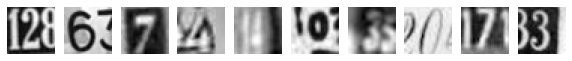

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

C. Reshape all the images with appropriate shape update the data in same variable

In [11]:
# reshaping X data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0],-1))

D. Normalise the images i.e. Normalise the pixel values.

In [12]:
# # normalize inputs from 0-255 to 0-1
x_train = X_train / 255.0
x_test = X_test / 255.0
x_val = X_val/255.0

E. Transform Labels into format acceptable by Neural Network

In [13]:

# converting y data into categorical (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


F. Print total Number of classes in the Dataset.

In [14]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

In [15]:
y_test.shape

(18000, 10)

In [16]:
print(y_train.value_counts().count())
print(y_test.value_counts().count())
print(y_val.value_counts().count())

10
10
10


3. Model Training & Evaluation using Neural Network 
A. Design a Neural Network to train a classifier. 

In [17]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# create model
model = Sequential()  

model.add(Dense(100, activation='relu',kernel_initializer='he_uniform',input_shape=(1024,))) ###Multiple Dense units with Relu activation
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [18]:
# Compile model
#RMS_prop=optimizers.RMSprop()
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               102500    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 32)                1632      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 119,612
Trainable params: 119,612
Non-trainable params: 0
_________________________________________________________________


B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [21]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
336/336 - 3s - loss: 2.2798 - accuracy: 0.1300 - val_loss: 2.1512 - val_accuracy: 0.2021 - 3s/epoch - 8ms/step
Epoch 2/100
336/336 - 2s - loss: 1.9028 - accuracy: 0.3139 - val_loss: 1.6488 - val_accuracy: 0.4163 - 2s/epoch - 4ms/step
Epoch 3/100
336/336 - 2s - loss: 1.5030 - accuracy: 0.4854 - val_loss: 1.4192 - val_accuracy: 0.5117 - 2s/epoch - 5ms/step
Epoch 4/100
336/336 - 2s - loss: 1.3495 - accuracy: 0.5471 - val_loss: 1.3782 - val_accuracy: 0.5400 - 2s/epoch - 5ms/step
Epoch 5/100
336/336 - 2s - loss: 1.2615 - accuracy: 0.5857 - val_loss: 1.2088 - val_accuracy: 0.6098 - 2s/epoch - 5ms/step
Epoch 6/100
336/336 - 2s - loss: 1.1923 - accuracy: 0.6137 - val_loss: 1.2247 - val_accuracy: 0.6054 - 2s/epoch - 5ms/step
Epoch 7/100
336/336 - 1s - loss: 1.1350 - accuracy: 0.6356 - val_loss: 1.0945 - val_accuracy: 0.6544 - 1s/epoch - 4ms/step
Epoch 8/100
336/336 - 2s - loss: 1.0865 - accuracy: 0.6548 - val_loss: 1.0790 - val_accuracy: 0.6582 - 2s/epoch - 5ms/step
Epoch 9/100
336/

In [22]:
 
results = model.evaluate(x_test, y_test)

563/563 [==============================] - 2s 2ms/step - loss: 0.7382 - accuracy: 0.7924


In [23]:
#Accuracy of 79.2% is attained with the base model.

C. Evaluate performance of the model with appropriate metrics

In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.792388916015625


In [25]:
# predicting the model on test data
y_pred=model.predict(x_test)
y_pred[0]

array([0.38212788, 0.32444897, 0.01832566, 0.01240285, 0.10565395,
       0.00140968, 0.03760161, 0.08035451, 0.02738917, 0.01028575],
      dtype=float32)

In [26]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [27]:
y_pred_final[0]

0

In [28]:
y_pred=model.predict(x_test) 
classes=np.argmax(y_pred,axis=1)
print(classes)

[0 7 2 ... 7 9 2]


In [29]:
# Compute the argmax across the columns.(decoding the one hot encoded)
decoded = tf.argmax(y_test, axis=1)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(decoded,y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1814
           1       0.75      0.85      0.79      1828
           2       0.78      0.80      0.79      1803
           3       0.76      0.76      0.76      1719
           4       0.84      0.82      0.83      1812
           5       0.75      0.80      0.77      1768
           6       0.82      0.80      0.81      1832
           7       0.81      0.83      0.82      1808
           8       0.79      0.73      0.76      1812
           9       0.79      0.74      0.77      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your 
observations on the same. 

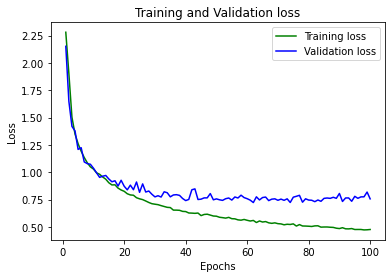

In [31]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs =range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training loss')
plt.plot(epochs,loss_val, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The plot of training loss continues to decrease with experience.
The plot of validation loss decreases to a point and begins increasing again

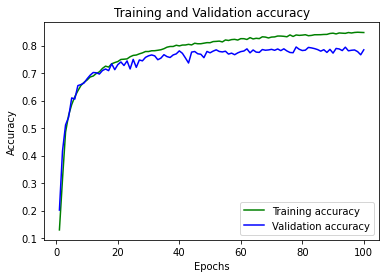

In [32]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training accuracy')
plt.plot(epochs,loss_val, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#the loss curve is not very steep.
#However, the accuracy curve for train and validation shows that our model without dropout and batch normalization is much less an overfit.
#oss is showing repetitive, step-like behavior. It's probable that the input data seen by the model is itself exhibiting repetitive behavior
#he line plot for accuracy shows bumps, given examples in the train and test set can ultimately only be predicted as correct or incorrect, providing less granular feedback on performance.